# **Demostración de Preprocesamiento de Series Temporales en Python**

## **Objetivo del Script:**
Este script muestra varias técnicas comunes de preprocesamiento para datos de series temporales utilizando bibliotecas populares de Python como Pandas y Matplotlib. Cada técnica se ilustra utilizando el conjunto de datos "Air Passengers" o un sustituto sintético.

## **Estructura del Script:**
1.  Carga de las librerías necesarias.
2.  Carga y preparación inicial del conjunto de datos de series temporales.
3.  Aplicación y visualización de técnicas de preprocesamiento:
    * Estructuración de Series Temporales (Conversión de Fechas, Ordenación).
    * Imputación de Valores Faltantes (Lineal, Spline, Basada en Tiempo).
    * Eliminación de Ruido (Suavizado con Medias Móviles).
    * Detección de Outliers (Valores Atípicos) con Bandas Estadísticas Móviles.

In [1]:
# ------------------------------------------------------------------------------
# 1. Carga de las Librerías
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configuraciones opcionales para Matplotlib
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8-whitegrid')

print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")

Pandas Version: 2.2.3
NumPy Version: 2.1.3


## **2. Carga y Preparación del Dataset de Series Temporales**

Cargaremos el dataset "Air Passengers". Se asume que está en un archivo CSV llamado `AirPassengers.csv`.
Realizaremos una inspección inicial y una estructuración básica.

Error: El archivo 'AirPassengers.csv' no fue encontrado.
Creando un dataset de ejemplo sintético para demostración...
Dataset de ejemplo sintético creado.

--- Primeras filas del dataset: ---
        Date  Passengers
0 1949-01-01         106
1 1949-02-01         129
2 1949-03-01         122
3 1949-04-01         122
4 1949-05-01         180

--- Información del DataFrame: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB

--- 3.1 Estructuración de Series Temporales ---

Columna 'Date' convertida a datetime.
Dataset ordenado por 'Date'.
Columna 'Date' establecida como índice.

--- Primeras filas después de la estructuración: ---
            Passengers
Date                  
1949-01-01  

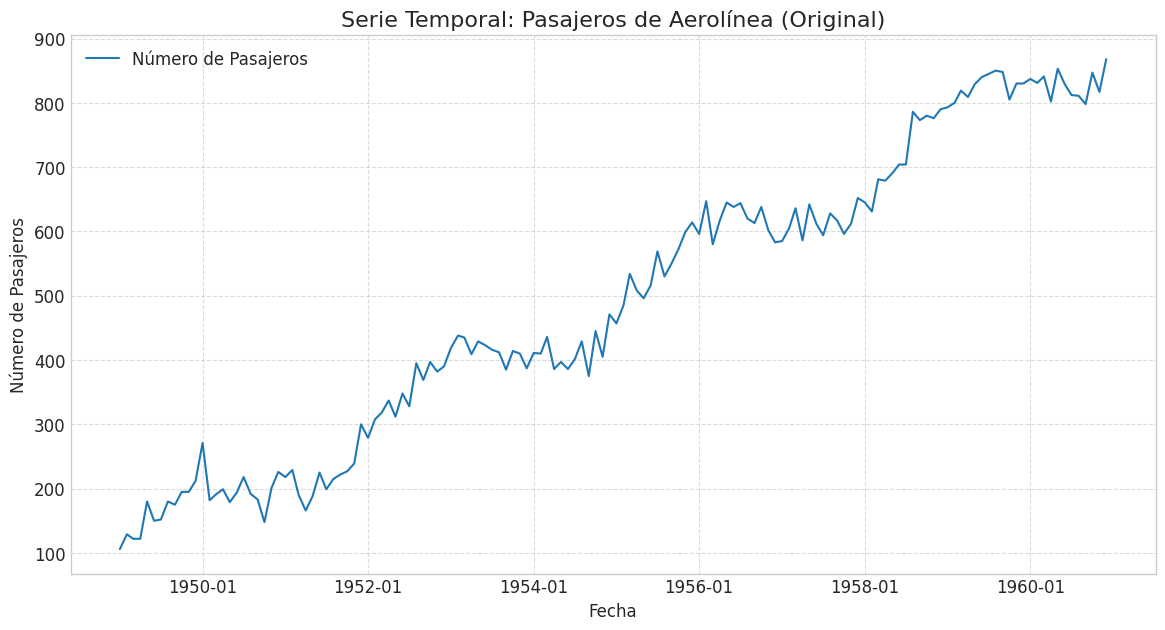

In [ ]:
# Carga del Dataset
csv_path = 'AirPassengers.csv' # ASEGÚRATE DE QUE ESTE ARCHIVO EXISTA O MODIFICA LA RUTA

try:
    df = pd.read_csv(csv_path)
    print(f"Dataset '{csv_path}' cargado exitosamente.")
    
    # Renombrar columnas para mayor claridad si es necesario (asumiendo 'Month' y '#Passengers')
    if '#Passengers' in df.columns:
        df.rename(columns={'Month': 'Date', '#Passengers': 'Passengers'}, inplace=True)
    elif 'Passengers' not in df.columns and len(df.columns) == 2:
        # Si las columnas no tienen nombres esperados pero son dos, se asumen Date y Passengers
        df.columns = ['Date', 'Passengers']
        print("Columnas renombradas a 'Date' y 'Passengers'.")

except FileNotFoundError:
    print(f"Error: El archivo '{csv_path}' no fue encontrado.")
    print("Creando un dataset de ejemplo sintético para demostración...")
    dates_example = pd.date_range(start='1949-01-01', periods=144, freq='MS')
    values_example = np.linspace(100, 600, 144) + \
                     np.random.randn(144)*20 + \
                     np.sin(np.arange(144)/6)*50 + \
                     np.arange(144) * 2 # Tendencia creciente
    values_example = np.maximum(50, values_example).astype(int)
    df = pd.DataFrame({'Date': dates_example, 'Passengers': values_example})
    print("Dataset de ejemplo sintético creado.")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar los datos: {e}")
    # Crear un DataFrame vacío para evitar errores posteriores si todo falla
    df = pd.DataFrame(columns=['Date', 'Passengers'])


if not df.empty:
    print("Primeras filas del dataset:")
    print(df.head())

    print("Información del DataFrame:")
    df.info()

    # --- 3.1 Estructuración de Series Temporales ---
    print("3.1 Estructuración de Series Temporales")

    # Convertir la columna de fecha a datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        print("Columna 'Date' convertida a datetime.")

        # Ordenar los valores por fecha (importante para series temporales)
        df.sort_values(by='Date', inplace=True)
        print("Dataset ordenado por 'Date'.")

        # Establecer la columna 'Date' como índice
        df.set_index('Date', inplace=True)
        print("Columna 'Date' establecida como índice.")

        print("Primeras filas después de la estructuración:")
        print(df.head())

        # Visualización inicial de la serie
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['Passengers'], label='Número de Pasajeros')
        plt.title('Serie Temporal: Pasajeros de Aerolínea (Original)', fontsize=16)
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Número de Pasajeros', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
        plt.show()
    else:
        print("Error: La columna 'Date' no se encuentra en el DataFrame.")
        df = pd.DataFrame() # Vaciar df si la estructura es incorrecta
else:
    print("DataFrame vacío, no se puede continuar con el preprocesamiento.")

### **3.2 Imputación de Valores Faltantes**
Los valores faltantes son comunes en series temporales. Las técnicas de imputación convencionales no siempre son adecuadas debido a la dependencia secuencial de los datos.
Se usarán métodos de interpolación. Para demostrarlo, introduciremos artificialmente algunos valores faltantes.

3.2 Imputación de Valores Faltantes

Introduciendo NaNs en 10 posiciones aleatorias.


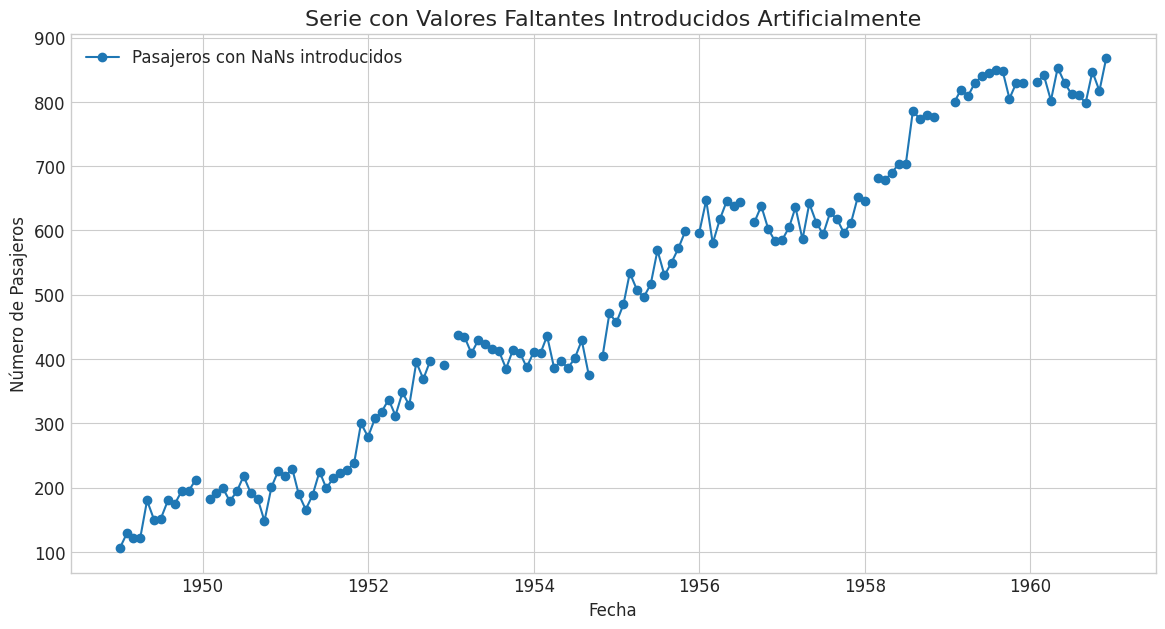


Comparación de valores imputados en los puntos NaN:
            Original  Linear    Spline_3        Time
Date                                                
1958-02-01       631   663.0  658.945452  663.915254
1960-01-01       837   830.5  822.537103  830.500000
1956-08-01       620   628.5  621.245058  628.500000
1955-12-01       614   597.5  585.931995  597.524590
1952-11-01       382   393.5  399.227681  393.442623
1958-12-01       790   784.0  773.226768  783.826087
1950-01-01       271   197.0  199.976224  197.000000
1954-10-01       445   390.0  358.004911  389.754098
1953-01-01       419   414.0  411.433962  414.000000
1959-01-01       793   792.0  780.465334  791.913043


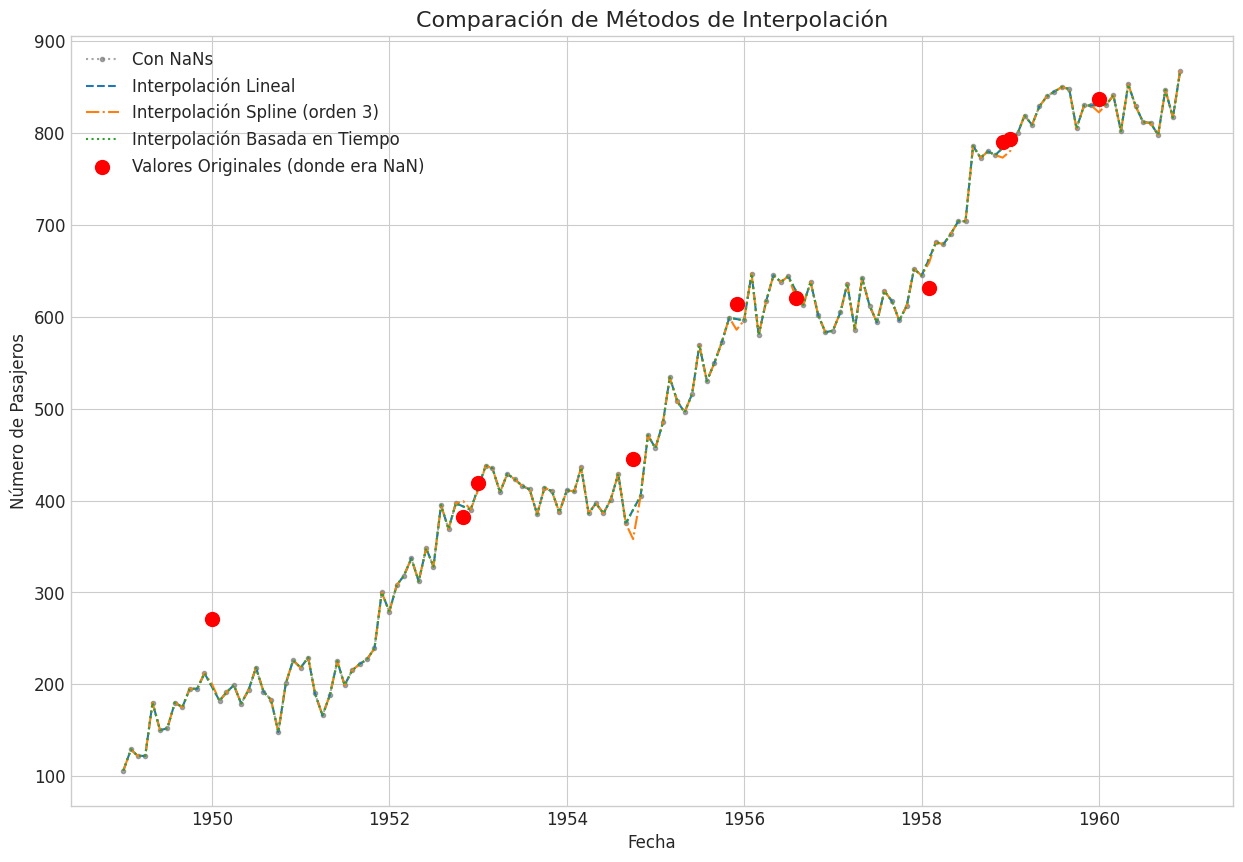

In [3]:
if not df.empty and 'Passengers' in df.columns:
    print("3.2 Imputación de Valores Faltantes")
    df_missing = df.copy()

    # Introducir artificialmente algunos valores NaN
    # Guardaremos los índices y valores originales para comparar después
    nan_indices_loc = np.random.choice(df_missing.index, size=10, replace=False)
    # Asegurarse de que los índices existan antes de intentar asignarles NaN
    nan_indices_pos = [df_missing.index.get_loc(idx) for idx in nan_indices_loc if idx in df_missing.index]

    if nan_indices_pos:
        print(f"\nIntroduciendo NaNs en {len(nan_indices_pos)} posiciones aleatorias.")
        original_values_at_nan = df_missing.iloc[nan_indices_pos]['Passengers'].copy()
        df_missing.iloc[nan_indices_pos, df_missing.columns.get_loc('Passengers')] = np.nan

        plt.figure(figsize=(14, 7))
        plt.plot(df_missing.index, df_missing['Passengers'], label='Pasajeros con NaNs introducidos', marker='o', linestyle='-')
        plt.title('Serie con Valores Faltantes Introducidos Artificialmente', fontsize=16)
        plt.xlabel('Fecha')
        plt.ylabel('Número de Pasajeros')
        plt.legend()
        plt.show()

        # Métodos de Interpolación
        df_imputed = df_missing.copy()
        df_imputed['Linear'] = df_missing['Passengers'].interpolate(method='linear')
        df_imputed['Spline_3'] = df_missing['Passengers'].interpolate(method='spline', order=3)
        df_imputed['Time'] = df_missing['Passengers'].interpolate(method='time') # 'time' usa los valores del índice (fechas)

        # Comparar imputaciones en los puntos donde introdujimos NaNs
        print("\nComparación de valores imputados en los puntos NaN:")
        comparison_df = pd.DataFrame({
            'Original': original_values_at_nan if isinstance(original_values_at_nan, pd.Series) else pd.Series(original_values_at_nan, index=df_missing.index[nan_indices_pos]),
            'Linear': df_imputed.loc[df_missing.index[nan_indices_pos], 'Linear'],
            'Spline_3': df_imputed.loc[df_missing.index[nan_indices_pos], 'Spline_3'],
            'Time': df_imputed.loc[df_missing.index[nan_indices_pos], 'Time']
        })
        print(comparison_df)

        # Visualizar resultados de la interpolación
        plt.figure(figsize=(15, 10))
        plt.plot(df_imputed.index, df_imputed['Passengers'], label='Con NaNs', marker='.', linestyle=':', color='gray', alpha=0.7)
        plt.plot(df_imputed.index, df_imputed['Linear'], label='Interpolación Lineal', linestyle='--')
        plt.plot(df_imputed.index, df_imputed['Spline_3'], label='Interpolación Spline (orden 3)', linestyle='-.')
        plt.plot(df_imputed.index, df_imputed['Time'], label='Interpolación Basada en Tiempo', linestyle=':')
        # Superponer los puntos originales que fueron NaN
        if not comparison_df.empty:
             plt.scatter(comparison_df.index, comparison_df['Original'], color='red', s=100, zorder=5, label='Valores Originales (donde era NaN)')

        plt.title('Comparación de Métodos de Interpolación', fontsize=16)
        plt.xlabel('Fecha')
        plt.ylabel('Número de Pasajeros')
        plt.legend()
        plt.show()
    else:
        print("No se pudieron introducir NaNs (posiblemente el dataset es muy pequeño o los índices no coincidieron).")
else:
    print("DataFrame vacío o sin columna 'Passengers', saltando imputación de valores faltantes.")

### **3.3 Eliminación de Ruido (Denoising)**
El ruido en una serie temporal puede ocultar patrones subyacentes. Una técnica común para suavizar la serie y reducir el ruido es el uso de medias móviles (rolling means).

3.3 Eliminación de Ruido (Suavizado con Medias Móviles)


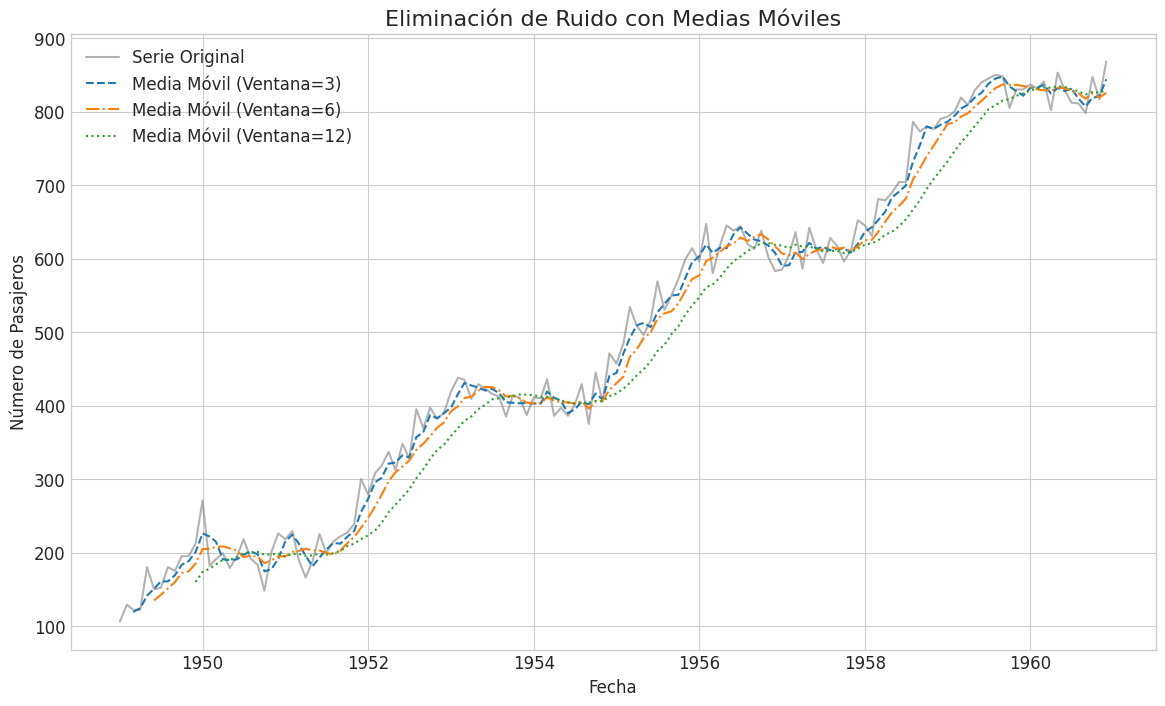


Primeras filas con medias móviles:
            Passengers  RollingMean_3  RollingMean_6  RollingMean_12
Date                                                                
1949-01-01         106            NaN            NaN             NaN
1949-02-01         129            NaN            NaN             NaN
1949-03-01         122     119.000000            NaN             NaN
1949-04-01         122     124.333333            NaN             NaN
1949-05-01         180     141.333333            NaN             NaN
1949-06-01         150     150.666667     134.833333             NaN
1949-07-01         152     160.666667     142.500000             NaN
1949-08-01         180     160.666667     151.000000             NaN
1949-09-01         175     169.000000     159.833333             NaN
1949-10-01         195     183.333333     172.000000             NaN
1949-11-01         195     188.333333     174.500000             NaN
1949-12-01         212     200.666667     184.833333      159.83333

In [4]:
if not df.empty and 'Passengers' in df.columns:
    print("3.3 Eliminación de Ruido (Suavizado con Medias Móviles)")
    
    # Calcular medias móviles con diferentes ventanas
    df_denoised = df.copy()
    df_denoised['RollingMean_3'] = df['Passengers'].rolling(window=3).mean()
    df_denoised['RollingMean_6'] = df['Passengers'].rolling(window=6).mean()
    df_denoised['RollingMean_12'] = df['Passengers'].rolling(window=12).mean()

    plt.figure(figsize=(14, 8))
    plt.plot(df_denoised.index, df_denoised['Passengers'], label='Serie Original', color='gray', alpha=0.6)
    plt.plot(df_denoised.index, df_denoised['RollingMean_3'], label='Media Móvil (Ventana=3)', linestyle='--')
    plt.plot(df_denoised.index, df_denoised['RollingMean_6'], label='Media Móvil (Ventana=6)', linestyle='-.')
    plt.plot(df_denoised.index, df_denoised['RollingMean_12'], label='Media Móvil (Ventana=12)', linestyle=':')
    
    plt.title('Eliminación de Ruido con Medias Móviles', fontsize=16)
    plt.xlabel('Fecha')
    plt.ylabel('Número de Pasajeros')
    plt.legend()
    plt.show()

    print("\nPrimeras filas con medias móviles:")
    print(df_denoised[['Passengers', 'RollingMean_3', 'RollingMean_6', 'RollingMean_12']].head(15))
else:
    print("DataFrame vacío o sin columna 'Passengers', saltando eliminación de ruido.")

### **3.4 Detección de Outliers (Valores Atípicos)**
Los outliers son picos o caídas repentinas en la tendencia. Un enfoque para detectarlos es usar bandas estadísticas móviles (por ejemplo, media ± k * desviación estándar).
Introduciremos artificialmente algunos outliers para la demostración.

3.4 Detección de Outliers con Bandas Estadísticas Móviles

Introduciendo outliers en 3 posiciones.


/tmp/ipykernel_35561/1664132011.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '255.89999999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_outliers.iloc[outlier_indices_pos[1], df_outliers.columns.get_loc('Passengers')] *= 0.3 # Outlier bajo


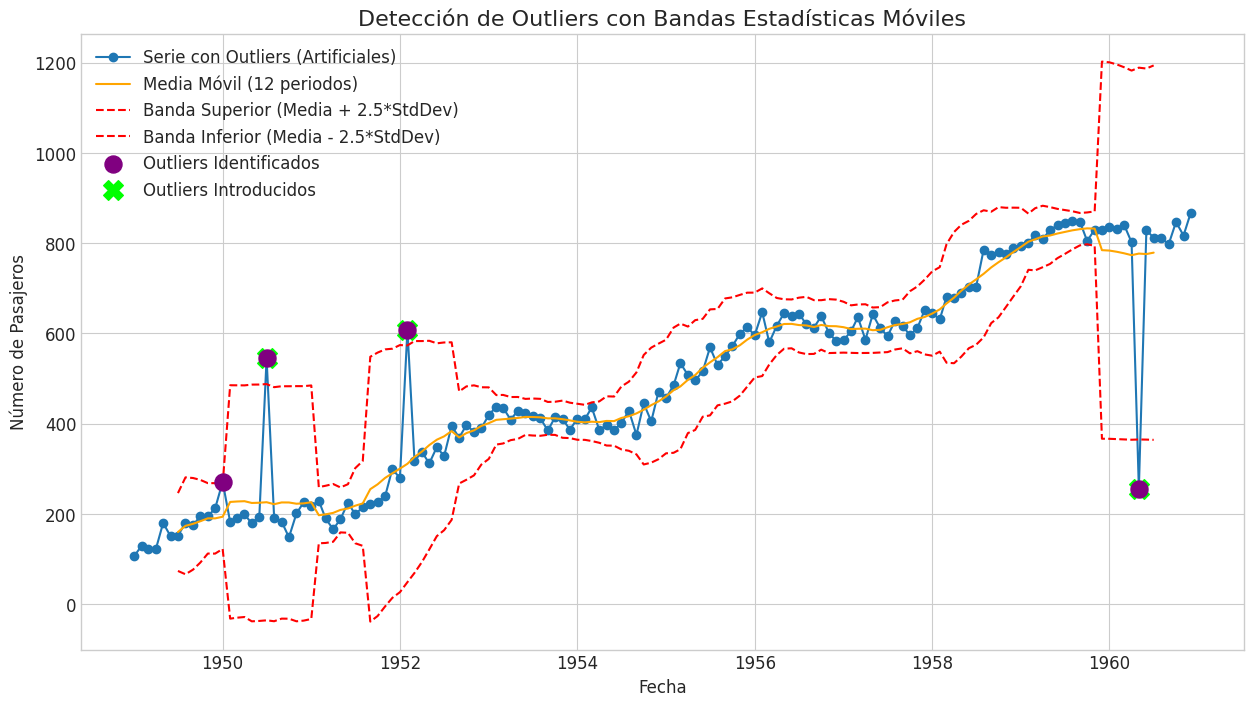


Outliers identificados:
            Passengers
Date                  
1950-01-01       271.0
1950-07-01       545.0
1952-02-01       608.0
1960-05-01       255.9

Valores originales en las posiciones de los outliers introducidos (para referencia):
Date
1950-07-01    218
1960-05-01    853
1952-02-01    308
Name: Passengers, dtype: int64


In [5]:
if not df.empty and 'Passengers' in df.columns:
    print("3.4 Detección de Outliers con Bandas Estadísticas Móviles")
    df_outliers = df.copy()

    # Introducir outliers artificiales
    outlier_indices_loc = np.random.choice(df_outliers.index, size=3, replace=False)
    # Asegurarse de que los índices existan antes de intentar modificarlos
    outlier_indices_pos = [df_outliers.index.get_loc(idx) for idx in outlier_indices_loc if idx in df_outliers.index]
    
    if outlier_indices_pos:
        print(f"\nIntroduciendo outliers en {len(outlier_indices_pos)} posiciones.")
        original_values_at_outliers = df_outliers.iloc[outlier_indices_pos]['Passengers'].copy()
        
        # Hacer que algunos valores sean mucho más altos y otros mucho más bajos
        df_outliers.iloc[outlier_indices_pos[0], df_outliers.columns.get_loc('Passengers')] *= 2.5 # Outlier alto
        if len(outlier_indices_pos) > 1:
            df_outliers.iloc[outlier_indices_pos[1], df_outliers.columns.get_loc('Passengers')] *= 0.3 # Outlier bajo
        if len(outlier_indices_pos) > 2:
             df_outliers.iloc[outlier_indices_pos[2], df_outliers.columns.get_loc('Passengers')] += 300 # Otro outlier alto

        # Calcular bandas estadísticas móviles
        window_size = 12 # Ventana de un año
        rolling_mean = df_outliers['Passengers'].rolling(window=window_size, center=True).mean()
        rolling_std = df_outliers['Passengers'].rolling(window=window_size, center=True).std()
        
        # Definir umbrales (e.g., Media +/- 3*StdDev)
        k = 2.5 # Factor k para las bandas
        upper_bound = rolling_mean + (k * rolling_std)
        lower_bound = rolling_mean - (k * rolling_std)

        # Identificar outliers
        identified_outliers = df_outliers[(df_outliers['Passengers'] > upper_bound) | (df_outliers['Passengers'] < lower_bound)]

        plt.figure(figsize=(15, 8))
        plt.plot(df_outliers.index, df_outliers['Passengers'], label='Serie con Outliers (Artificiales)', marker='o', linestyle='-')
        plt.plot(rolling_mean.index, rolling_mean, label=f'Media Móvil ({window_size} periodos)', color='orange')
        plt.plot(upper_bound.index, upper_bound, label=f'Banda Superior (Media + {k}*StdDev)', color='red', linestyle='--')
        plt.plot(lower_bound.index, lower_bound, label=f'Banda Inferior (Media - {k}*StdDev)', color='red', linestyle='--')
        
        if not identified_outliers.empty:
            plt.scatter(identified_outliers.index, identified_outliers['Passengers'], color='purple', s=150, zorder=5, label='Outliers Identificados')
        
        # Resaltar los outliers introducidos originalmente si es posible
        plt.scatter(df_outliers.index[outlier_indices_pos], df_outliers.iloc[outlier_indices_pos]['Passengers'], 
                    color='lime', marker='X', s=200, zorder=4, label='Outliers Introducidos')


        plt.title('Detección de Outliers con Bandas Estadísticas Móviles', fontsize=16)
        plt.xlabel('Fecha')
        plt.ylabel('Número de Pasajeros')
        plt.legend(loc='upper left')
        plt.show()

        print("\nOutliers identificados:")
        if not identified_outliers.empty:
            print(identified_outliers)
        else:
            print("No se identificaron outliers con los criterios actuales.")
        
        print("\nValores originales en las posiciones de los outliers introducidos (para referencia):")
        print(original_values_at_outliers)
    else:
        print("No se pudieron introducir outliers (posiblemente el dataset es muy pequeño).")
else:
    print("DataFrame vacío o sin columna 'Passengers', saltando detección de outliers.")

## **4. Conclusiones**

Este script ha demostrado varios pasos cruciales en el preprocesamiento de datos de series temporales:
* **Estructuración:** Asegurar que las fechas estén correctamente formateadas, ordenadas y utilizadas como índice es fundamental.
* **Imputación de Valores Faltantes:** Se mostraron métodos de interpolación que respetan la naturaleza secuencial de los datos.
* **Eliminación de Ruido:** Las medias móviles ayudan a suavizar la serie y resaltar tendencias.
* **Detección de Outliers:** Las bandas estadísticas móviles son un método intuitivo para identificar valores atípicos.

Un preprocesamiento adecuado es esencial para obtener modelos de series temporales precisos y fiables.

In [6]:
print("Fin del script de demostración de preprocesamiento de series temporales.")

Fin del script de demostración de preprocesamiento de series temporales.
